In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import platform
import socket
from platform import python_version
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\sandr\Documents\01 Data\01 ZHAW\06 Semester\04 KI Anwendung\00 Project\app


In [2]:
df = pd.read_csv('merged_data.csv')
df.head()

,Richtung,AnzFahrzeuge,Luftfeuchtigkeit (%Hr),Luftdruck (hPa),Niederschlag,Temperatur (°C),Time,Date,holiday,Hour,Weekday,Year,Month,Day
0,0,4043.0,92.51,970.12,1,7.58,00:00:00,2012-01-01,1,0,6,2012,1,1
1,1,2931.0,92.51,970.12,1,7.58,00:00:00,2012-01-01,1,0,6,2012,1,1
2,0,11021.0,91.00,970.09,1,7.98,01:00:00,2012-01-01,1,1,6,2012,1,1
3,1,6660.0,91.00,970.09,1,7.98,01:00:00,2012-01-01,1,1,6,2012,1,1
4,0,7892.0,90.38,970.46,0,7.62,02:00:00,2012-01-01,1,2,6,2012,1,1


### Prep

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['Temperatur (°C)',
                                                        'Niederschlag',
                                                        'Richtung',
                                                        'Luftfeuchtigkeit (%Hr)',
                                                        'Luftdruck (hPa)',
                                                        'holiday',
                                                        'Hour',
                                                        'Weekday',
                                                        'Year',
                                                        'Month',
                                                        'Day']], 
                                                    df['AnzFahrzeuge'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
        Temperatur (°C)  Niederschlag  Richtung  Luftfeuchtigkeit (%Hr)  \
75941              9.91             1         1                   80.85   
38564             12.80             0         0                   49.99   
71511             11.93             0         1                   78.84   
17263              9.18             0         1                   58.24   
143786            10.79             0         0                   80.75   

        Luftdruck (hPa)  holiday  Hour  Weekday  Year  Month  Day  
75941            973.09        0    16        1  2016      5    3  
38564            971.85        0    13        5  2014      3   15  
71511            976.02        0     8        0  2016      2    1  
17263            969.26        0    13        2  2012     12   26  
143786           967.29        0    10        5  2020      3   21   

y_train:
75941     18903.0
38564     16568.0
71511     25750.0
17263     12616.0
143786     7525.0
Name: AnzFahrzeuge, dtype: floa

In [4]:
lin_reg = LinearRegression().fit(X_train, y_train)

y_predicted = lin_reg.predict(X_test)

y_residuals = y_test - y_predicted

mse = mean_squared_error(y_test, y_predicted)

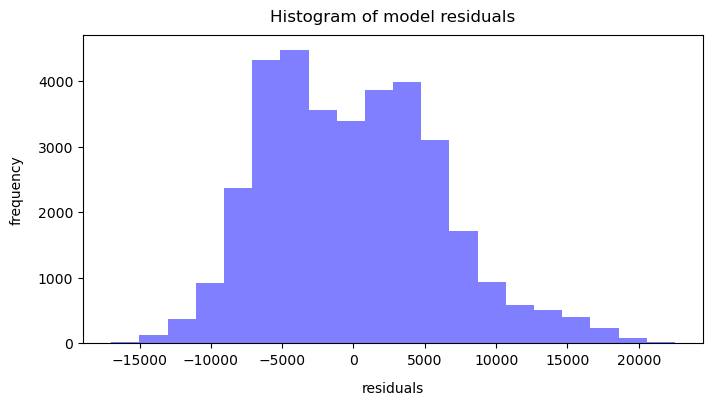

In [5]:
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=y_residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Linear Regression

In [36]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

scores = cross_val_score(linear_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(linear_model))
print(scores)
print(np.mean(scores)) 

--LinearRegression()--
[-6123.9667721  -6127.17508298 -6093.71064974 -6145.20447601
 -6111.97408713]
-6120.406213592671


In [37]:
linear_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Polynominal 

In [ ]:
polynomial_model = Pipeline([
                                ("polynomial_features", PolynomialFeatures(degree=2)),
                                ("linear_regression", LinearRegression()),
                            ])

scores = cross_val_score(polynomial_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(polynomial_model))
print(scores)
print(np.mean(scores)) 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'polynomial_features__degree': [2, 3, 4], 
'polynomial_features__include_bias': [True, False],
}

grid_search_pl = GridSearchCV(polynomial_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2) # add param verbose = 2 to see the state
grid_search_pl.fit(X_train, y_train)
print(grid_search_pl.best_estimator_)
print(grid_search_pl.best_params_)
print(grid_search_pl.best_score_)

### Random Forest


In [ ]:
randomforest_model = RandomForestRegressor(random_state=42)

scores = cross_val_score(randomforest_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(randomforest_model))
print(scores)
print(np.mean(scores)) 

In [ ]:
randomforest_model.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [10, 15, 20 ],
'max_features': [5, 7, 9]
}

grid_search_rf = GridSearchCV(randomforest_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2) # add param verbose = 2 to see the state
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_estimator_)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

### Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

gradientboost_model = GradientBoostingRegressor(random_state=42)

scores = cross_val_score(gradientboost_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print('--{}--'.format(gradientboost_model))
print(scores)
print(np.mean(scores))


--GradientBoostingRegressor(random_state=42)--
[-2215.63992903 -2173.43434279 -2163.64487398 -2238.66090865
 -2162.8905522 ]
-2190.854121330483


In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gradientboost_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'max_depth': [10, 15, 20], 
    'max_features': [5, 7, 9]
}

grid_search_gb = GridSearchCV(gradientboost_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid_search_gb.fit(X_train, y_train)
print(grid_search_gb.best_estimator_)
print(grid_search_gb.best_params_)
print(grid_search_gb.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................max_depth=10, max_features=5; total time=  18.1s
[CV] END .......................max_depth=10, max_features=5; total time=  17.2s
[CV] END .......................max_depth=10, max_features=5; total time=  17.2s
[CV] END .......................max_depth=10, max_features=5; total time=  17.2s
[CV] END .......................max_depth=10, max_features=5; total time=  17.1s
[CV] END .......................max_depth=10, max_features=7; total time=  23.2s
[CV] END .......................max_depth=10, max_features=7; total time=  23.3s
[CV] END .......................max_depth=10, max_features=7; total time=  23.3s
[CV] END .......................max_depth=10, max_features=7; total time=  23.3s
[CV] END .......................max_depth=10, max_features=7; total time=  23.3s
[CV] END .......................max_depth=10, max_features=9; total time=  29.4s
[CV] END .......................max_depth=10, max

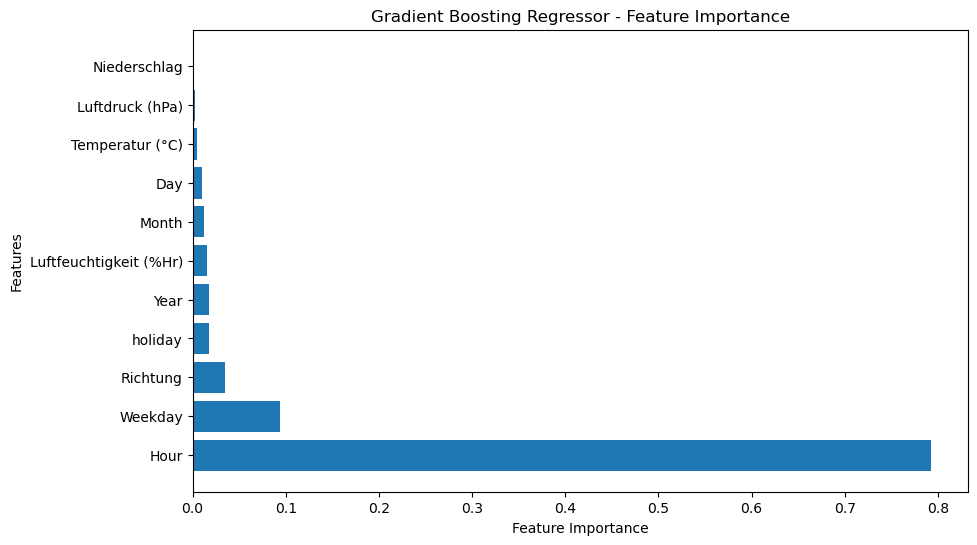

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you have a trained GridSearchCV model named 'grid_search_gb' from the previous code

# Extract the best fitted model from the GridSearchCV
best_model = grid_search_gb.best_estimator_

# Extract the feature importances from the best fitted model
feature_importance = best_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Extract the names of the features in the correct order
feature_names = X_train.columns[sorted_indices]

# Extract the feature importances in the correct order
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), sorted_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()


### Gradient Boosting Model mit besten Parameter trainieren

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# defining the gradient boosting regressor
gb_model_use = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=300)

# training the model with the trainingdata
gb_model_use.fit(X_train, y_train)

# prediction on training data
y_train_pred = gb_model_use.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train RMSE: ", train_rmse)

# prediction on test data
y_test_pred = gb_model_use.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE: ", test_rmse)

Train RMSE:  699.1955934435981
Test RMSE:  759.0378016040644


### Model speichern 

In [13]:
import pickle

# saving model to file
model_filename = "gradient_boost_regression.pkl" 
with open(model_filename, 'wb') as f:
    pickle.dump(gb_model_use, f)